# LeNet Lab
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
# Load pickled data
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.model_selection import train_test_split

# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
#validation_file=?
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
#with open(validation_file, mode='rb') as f:
#    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
#print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Test Set:       12630 samples


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

print("Updated Image Shape: {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Updated Image Shape: (32, 32, 3)
Training Set:   27839 samples
Validation Set: 6960 samples
Test Set:       12630 samples


The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

'\nfor i in range(5):\n    for j in range(5):\n        index = random.randint(0, len(X_train))\n        image = X_train[index].squeeze\n        ax[i][j].imshow(image)\n        #print(y_train[index])\n        '

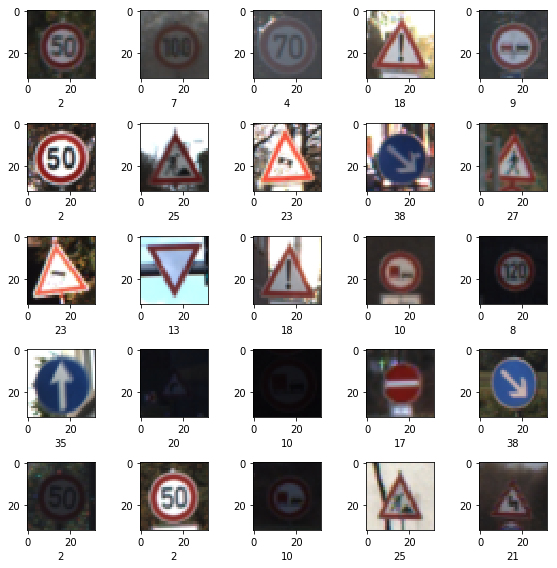

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nrows=5
ncols=5
fig, ax = plt.subplots(nrows,ncols,figsize=(8,8))

for i in range(nrows):
    for j in range(ncols):
        index = random.randint(0,len(X_train))
        img = X_train[index]
        class_id = y_train[index]
        ax[i][j].set_xlabel(class_id)
        ax[i][j].imshow(img)

plt.tight_layout()

#plt.show()
#plt.tight_layout(pad=0., w_pad=0., h_pad=1.0)

In [ ]:
img


## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [4]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [5]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128

In [6]:
def normalization(image):
    return (image-128.)/128.


#def 

In [7]:
import numpy as np

#X_train_rgb = X_train
X_train = np.sum(X_train/3, axis=3, keepdims=True)
print("Updated Image Shape: {}".format(X_train[0].shape))
X_validation=np.sum(X_validation/3, axis=3, keepdims=True)
X_test=np.sum(X_test/3, axis=3, keepdims=True)

X_train=np.array([normalization(img) for img in X_train])
X_validation=np.array([normalization(img) for img in X_validation])
X_test=np.array([normalization(img) for img in X_test])


Updated Image Shape: (32, 32, 1)


## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [8]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    mu = 0
    sigma = 0.08
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    weight1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 16), mean = mu, stddev = sigma))
    bias1 = tf.Variable(tf.zeros(16))
    conv_layer = tf.nn.conv2d(x, weight1, strides=[1, 1, 1, 1], padding='VALID')
    conv_layer = tf.nn.bias_add(conv_layer, bias1)

    # TODO: Activation.
    conv_layer = tf.nn.relu(conv_layer)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool = tf.nn.max_pool(conv_layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding = 'VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    weight2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 64), mean = mu, stddev = sigma))
    bias2 = tf.Variable(tf.zeros(64))
    conv_layer = tf.nn.conv2d(pool, weight2, strides=[1, 1, 1, 1], padding='VALID')
    conv_layer = tf.nn.bias_add(conv_layer, bias2)
    
    # TODO: Activation.
    conv_layer = tf.nn.relu(conv_layer)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    pool = tf.nn.max_pool(conv_layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding = 'VALID')

    # TODO: Flatten. Input = 1x1x400. Output = 400.
    fc0 = flatten(pool)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 400), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(400, 200), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(200))
    fc2   = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(200, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits  = tf.matmul(fc2, fc3_W) + fc3_b
    
    weights=[weight1,weight2,fc1_W,fc2_W,fc3_W]
    return logits,weights

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [10]:
rate = 0.00097

logits,weights = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
regularizers=0.00
for w in weights:
    regularizers+=tf.nn.l2_loss(w)
loss_operation = tf.reduce_mean(cross_entropy)+1e-5*regularizers
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [36]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        #print(offset)
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.839

EPOCH 2 ...
Validation Accuracy = 0.952

EPOCH 3 ...
Validation Accuracy = 0.971

EPOCH 4 ...
Validation Accuracy = 0.982

EPOCH 5 ...
Validation Accuracy = 0.987

EPOCH 6 ...
Validation Accuracy = 0.989

EPOCH 7 ...
Validation Accuracy = 0.991

EPOCH 8 ...
Validation Accuracy = 0.993

EPOCH 9 ...
Validation Accuracy = 0.991

EPOCH 10 ...
Validation Accuracy = 0.992

EPOCH 11 ...
Validation Accuracy = 0.992

EPOCH 12 ...
Validation Accuracy = 0.994

EPOCH 13 ...
Validation Accuracy = 0.994

EPOCH 14 ...
Validation Accuracy = 0.993

EPOCH 15 ...
Validation Accuracy = 0.994

EPOCH 16 ...
Validation Accuracy = 0.995

EPOCH 17 ...
Validation Accuracy = 0.994

EPOCH 18 ...
Validation Accuracy = 0.994

EPOCH 19 ...
Validation Accuracy = 0.995

EPOCH 20 ...
Validation Accuracy = 0.995

EPOCH 21 ...
Validation Accuracy = 0.995

EPOCH 22 ...
Validation Accuracy = 0.995

EPOCH 23 ...
Validation Accuracy = 0.995

EPOCH 24 ...
Validation Accura

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.956


9


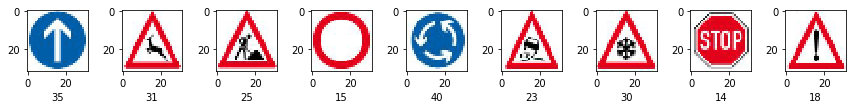

In [60]:
import cv2
from PIL import Image
import glob
import numpy as np

filelist = glob.glob('test_images_copy/*.jpg')
x_mytest_old = np.array([cv2.resize(plt.imread(fname), (32, 32)) for fname in filelist])
x_mytest = np.array([cv2.resize(plt.imread(fname), (32, 32)) for fname in filelist])
#y_mytest=np.array([7,15,25,40,23])
#y_mytest=np.array([35,25,15,40,14,10,11,12,13])
y_mytest=np.array([35,31,25,15,40,23,30,14,18])
print(len(y_mytest))
nrows=1
ncols=9
fig, ax = plt.subplots(nrows,ncols,figsize=(12,2))

for i in range(ncols):
    img = x_mytest[i]
    class_id = y_mytest[i]
    ax[i].set_xlabel(class_id)
    ax[i].imshow(img)

plt.tight_layout()

x_mytest = np.sum(x_mytest/3, axis=3, keepdims=True)
x_mytest = np.array([normalization(img) for img in x_mytest])

In [50]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(x_mytest, y_mytest)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

0
Test Accuracy = 1.000


In [64]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    softmaxes = sess.run(tf.nn.softmax(logits),feed_dict={x: x_mytest, y: y_mytest, keep_prob: 1.0})
    values,indices=sess.run(tf.nn.top_k(softmaxes, k=5),feed_dict={x: x_mytest, y: y_mytest, keep_prob: 1.0})
    print(str(indices))

[[35  3 34 36  9]
 [31 21 25 23 19]
 [25 18 22 26 20]
 [15 14  1 38  4]
 [40 26 12  7 17]
 [23 30 21 31 19]
 [30 11 23 28 29]
 [14 13 17 38 34]
 [18 26  0  1  2]]


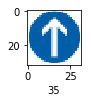

***Top 5 predictions***
 Class_id:35  confidence:100%
 Class_id: 3  confidence:0%
 Class_id:34  confidence:0%
 Class_id:36  confidence:0%
 Class_id: 9  confidence:0%


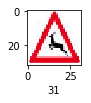

***Top 5 predictions***
 Class_id:31  confidence:100%
 Class_id:21  confidence:0%
 Class_id:25  confidence:0%
 Class_id:23  confidence:0%
 Class_id:19  confidence:0%


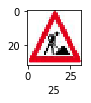

***Top 5 predictions***
 Class_id:25  confidence:100%
 Class_id:18  confidence:0%
 Class_id:22  confidence:0%
 Class_id:26  confidence:0%
 Class_id:20  confidence:0%


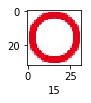

***Top 5 predictions***
 Class_id:15  confidence:100%
 Class_id:14  confidence:0%
 Class_id: 1  confidence:0%
 Class_id:38  confidence:0%
 Class_id: 4  confidence:0%


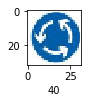

***Top 5 predictions***
 Class_id:40  confidence:100%
 Class_id:26  confidence:0%
 Class_id:12  confidence:0%
 Class_id: 7  confidence:0%
 Class_id:17  confidence:0%


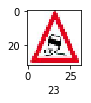

***Top 5 predictions***
 Class_id:23  confidence:100%
 Class_id:30  confidence:0%
 Class_id:21  confidence:0%
 Class_id:31  confidence:0%
 Class_id:19  confidence:0%


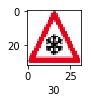

***Top 5 predictions***
 Class_id:30  confidence:69%
 Class_id:11  confidence:31%
 Class_id:23  confidence:0%
 Class_id:28  confidence:0%
 Class_id:29  confidence:0%


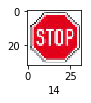

***Top 5 predictions***
 Class_id:14  confidence:100%
 Class_id:13  confidence:0%
 Class_id:17  confidence:0%
 Class_id:38  confidence:0%
 Class_id:34  confidence:0%


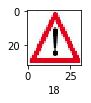

***Top 5 predictions***
 Class_id:18  confidence:100%
 Class_id:26  confidence:0%
 Class_id: 0  confidence:0%
 Class_id: 1  confidence:0%
 Class_id: 2  confidence:0%


In [69]:
for i in range(9):
    plt.figure(figsize=(1,1))
    img=x_mytest_old[i]
    label=indices[i][0]
    plt.imshow(img)
    top_pred_probab=values[i][0]
    plt.xlabel(label)
    plt.show()
    print("***Top 5 predictions***") 
    for j in range(5):
        print ( ' Class_id:{0:2d}  confidence:{1:.0%}'.format((indices[i][j]),(values[i][j])))